Part1

Logistic Regression class that subclasses nn.Module and implements its methods.

In [4]:
import torch
from torch import nn
import numpy as np
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [5]:
rng = np.random.default_rng(123)
passes_sleep = rng.normal(loc=8, scale=1, size=72)
passes_study = rng.normal(loc=12, scale=3, size=72)
fails_sleep = rng.normal(loc=6, scale=1.5, size=28)
fails_study = rng.normal(loc=6, scale=2, size=28)

In [6]:
torch.manual_seed(0)

class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred


X_pass = np.column_stack((passes_sleep, passes_study))
X_fail = np.column_stack((fails_sleep, fails_study))
X = np.vstack((X_pass, X_fail))
Y = np.hstack((np.ones(72), np.zeros(28)))


X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1)


dataset = TensorDataset(X_tensor, Y_tensor)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

input_dim = 2
model = LogisticRegression(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

#Training model
num_epochs = 1000
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #Print loss for every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.3992
Epoch [200/1000], Loss: 0.1221
Epoch [300/1000], Loss: 0.2905
Epoch [400/1000], Loss: 0.3387
Epoch [500/1000], Loss: 0.3714
Epoch [600/1000], Loss: 0.6597
Epoch [700/1000], Loss: 0.0863
Epoch [800/1000], Loss: 0.0736
Epoch [900/1000], Loss: 0.2720
Epoch [1000/1000], Loss: 0.1297


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Part2

1. Using fitted model to make predictions

In [8]:
test_sleep = np.array([
    7.06, 7.19, 7.59, 8.84, 9.66, 9.72, 8.81,
    8.44, 5.66, 9.13, 8.04, 5.31, 7.07, 8.33, 7.83
])
test_study = np.array([
    19.89, 13.36, 12.7, 14.1, 14.19, 12.4, 10.88, 
    13.09, 7.88, 6.35, 4.89, 6.65, 3.67, 5.79, 8.09
])

# Convert test data to tensor
test_data = np.column_stack((test_sleep, test_study))
test_tensor = torch.tensor(test_data, dtype=torch.float32)

# Predictions
with torch.no_grad():
    test_predictions = model(test_tensor)

#Predictions - Probabilities
test_probabilities = test_predictions.numpy().flatten()
print("Test probabilities:", test_probabilities)

#Convert to binary predictions
test_binary_predictions = (test_probabilities > 0.5).astype(int)
print("Binary predictions (Pass: 1, Fail: 0):", test_binary_predictions)

Test probabilities: [0.9995295  0.97630274 0.964094   0.98266923 0.9825227  0.9500998
 0.890975   0.9695311  0.63065666 0.34251788 0.19031224 0.45537448
 0.10827243 0.28330436 0.6213765 ]
Binary predictions (Pass: 1, Fail: 0): [1 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


2. Draw your fitted model's decision boundary onto the plot above.

In [9]:
import matplotlib.pyplot as plt

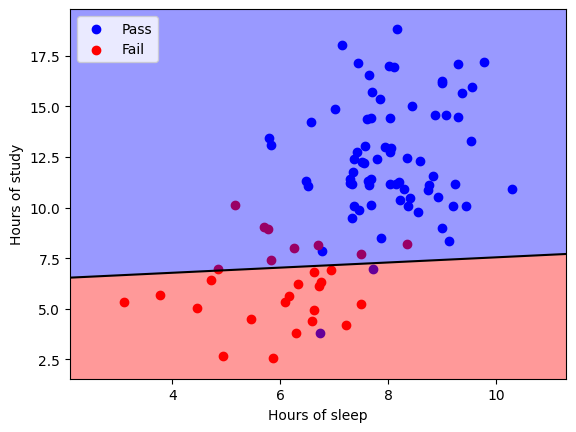

In [11]:
def plot_decision_boundary(X, Y, model):
    plt.scatter(X[Y==1][:, 0], X[Y==1][:, 1], c='blue', label='Pass')
    plt.scatter(X[Y==0][:, 0], X[Y==0][:, 1], c='red', label='Fail')

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    X_grid = np.column_stack((xx1.ravel(), xx2.ravel()))
    with torch.no_grad():
        yy = model(torch.tensor(X_grid, dtype=torch.float32)).numpy().reshape(xx1.shape)
    plt.contourf(xx1, xx2, yy, levels=[0, 0.5, 1], alpha=0.4, colors=['red', 'blue'])
    plt.contour(xx1, xx2, yy, levels=[0.5], colors='black')

    plt.xlabel('Hours of sleep')
    plt.ylabel('Hours of study')
    plt.legend()
    plt.show()

plot_decision_boundary(X, Y, model)